In [9]:
import os
import pandas as pd
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import geopandas
import matplotlib.pyplot as plt
from descartes import PolygonPatch

%matplotlib inline

In [10]:
counties_csv = Path("../data/cleandata/median_yearly_income.csv")
counties_df = pd.read_csv(
    counties_csv,
    index_col = "zipcode"
)
counties_df.head()

,County,City,State,2020_Year_Wage,2019_Year_Wage,2018_Year_Wage,3_year_wage_avg,latitude,longitude
zipcode,,,,,,,,,
90001,Los_Angeles_County,Los Angeles,CA,68068,61932,59892,63297.33,33.97,-118.24
94101,San_Francisco_County,San Francisco,CA,149604,119880,109332,126272.00,37.77,-122.41
93001,Ventura_County,Los Angeles,CA,60788,53400,50976,55054.67,34.33,-119.31
80528,Larimer_County,Fort Collins,CO,55588,49776,47832,51065.33,40.55,-105.06
30369,Fulton_County,Atlanta,GA,96252,72660,45276,71396.00,33.80,-84.47


In [11]:
counties_gdf = geopandas.GeoDataFrame(
    counties_df, geometry = geopandas.points_from_xy(counties_df.longitude, counties_df.latitude)
)

In [12]:
print(counties_gdf.head())

                       County           City State  2020_Year_Wage  \
zipcode                                                              
90001      Los_Angeles_County    Los Angeles    CA           68068   
94101    San_Francisco_County  San Francisco    CA          149604   
93001          Ventura_County    Los Angeles    CA           60788   
80528          Larimer_County   Fort Collins    CO           55588   
30369           Fulton_County        Atlanta    GA           96252   

         2019_Year_Wage  2018_Year_Wage  3_year_wage_avg  latitude  longitude  \
zipcode                                                                         
90001             61932           59892         63297.33     33.97    -118.24   
94101            119880          109332        126272.00     37.77    -122.41   
93001             53400           50976         55054.67     34.33    -119.31   
80528             49776           47832         51065.33     40.55    -105.06   
30369             72660

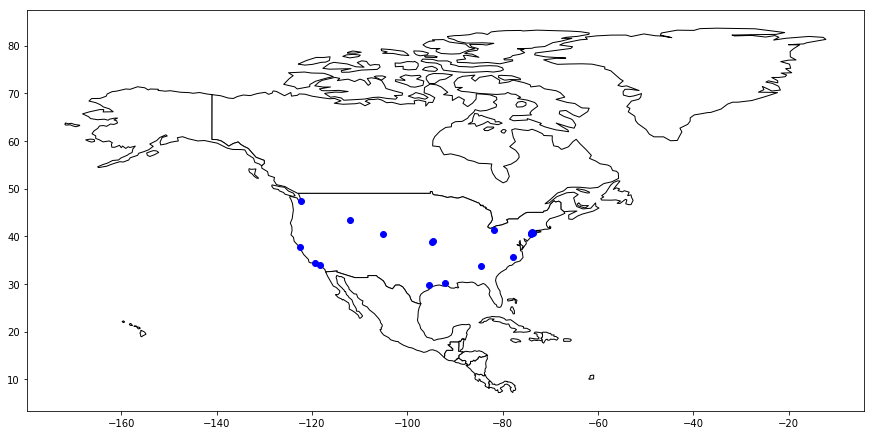

In [13]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'North America'].plot(
    figsize=(15,10), color = 'white', edgecolor = 'black'
)

counties_gdf.plot(ax=ax, color = 'blue')
plt.savefig('counties.png')
plt.show()